In [3]:
# import warnings

#warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


<IPython.core.display.Javascript object>

## Loading the dataset

In [4]:
# Loading the dataset - sheet_name parameter is used if there are multiple tabs in the excel file.
data = pd.read_csv("Credit Risk data.csv")

<IPython.core.display.Javascript object>

## Overview of the dataset

In [5]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
0,67,male,skilled,own,little,little,1169,6,0,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,1,radio/TV
2,49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
3,45,male,skilled,free,little,little,7882,42,0,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,1,car


<IPython.core.display.Javascript object>

- The dataset contains information about the different applicants.

- The dataset contains information about the different applicants.

### Understand the shape of the dataset.

In [6]:
data.shape

(1000, 10)

<IPython.core.display.Javascript object>

- There are 1000 rows and 10 columns in the dataset.

### Check the data types of the columns in the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Risk              1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


<IPython.core.display.Javascript object>

- There are total 10 columns and 1,000 observations in the dataset
- We have only three continuous variables - Age, Credit Amount, and Duration.
- All other variables are categorical
- We can see that there are no missing values in the dataset.

### Checking duplicates

In [8]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicates in the dataset.

### Checking missing values

In [9]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Risk                0
Purpose             0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the dataset.

### Statistical summary of the data

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


<IPython.core.display.Javascript object>

**Observations**

- Mean value for the age column is approx 35 and the median is 33. This shows that majority of the customers are under 35 years of age.
- Mean amount of credit is approx 3,271 but it has a wide range with values from 250 to 18,424. We will explore this further in univariate analysis.
- Mean duration for which the credit is given is approx 21 months.

In [11]:
# Making a list of all catrgorical variables
cat_col = [
    "Sex",
    "Job",
    "Housing",
    "Saving accounts",
    "Checking account",
    "Purpose",
    "Risk",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

male      690
female    310
Name: Sex, dtype: int64
----------------------------------------
skilled                       630
unskilled_and_non-resident    222
highly skilled                148
Name: Job, dtype: int64
----------------------------------------
own     713
rent    179
free    108
Name: Housing, dtype: int64
----------------------------------------
little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
----------------------------------------
moderate    472
little      465
rich         63
Name: Checking account, dtype: int64
----------------------------------------
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64
----------------------------------------
0    700
1    300
Name: Risk, dtype: int64
--------------------------------

<IPython.core.display.Javascript object>

- We have more male customers as compared to female customers
- There are very few observations i.e., only 22 for customers with job category - unskilled and non-resident
- We can see that the distribution of classes in the target variable is imbalanced i.e., only 30% observations with defaulters.
- Most of the customers are not at risk.

## Univariate analysis

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observation on Age 

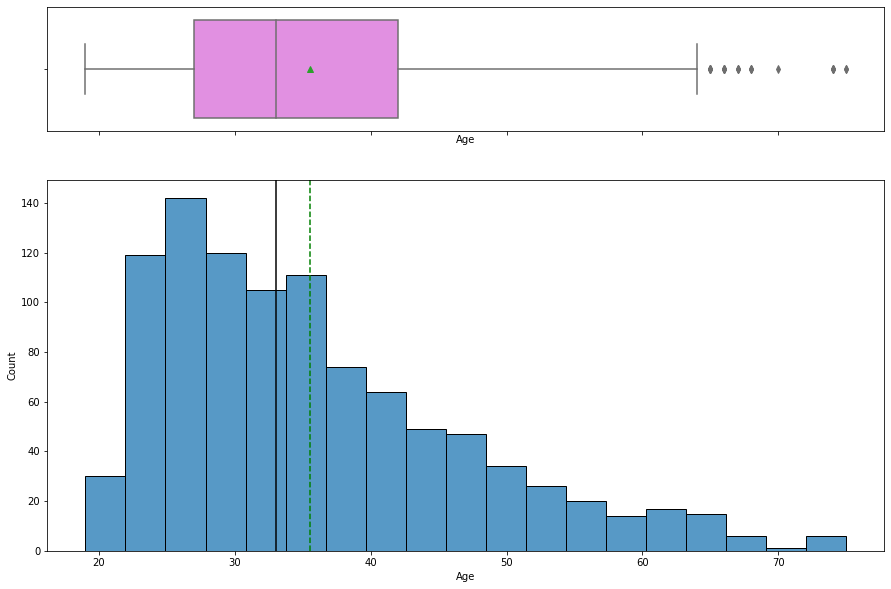

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(data, "Age")

- The distribution of age is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

### Observation on Credit Amount

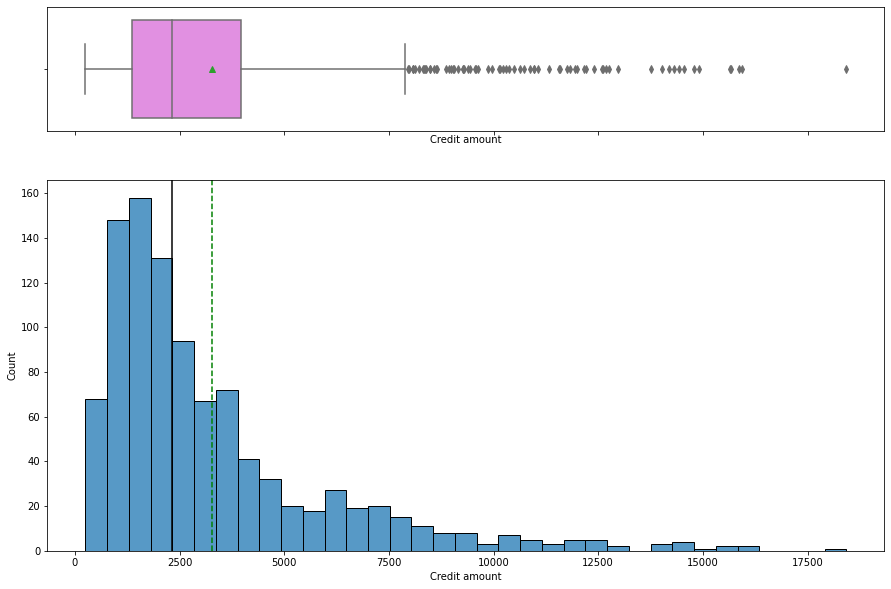

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(data, "Credit amount")

- The distribution of the credit amount is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

### Observations on Duration

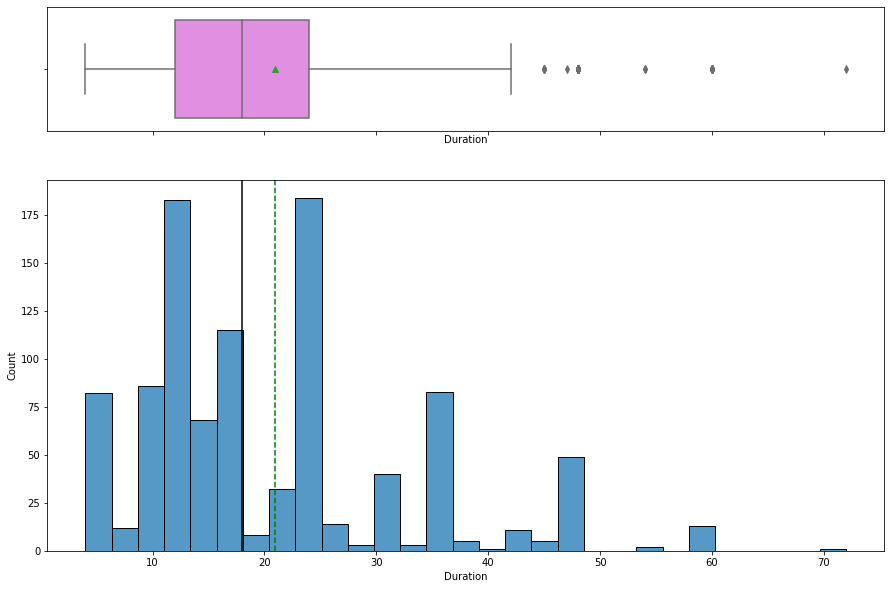

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(data, "Duration")

- The distribution of the duration for which the credit is given is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Risk

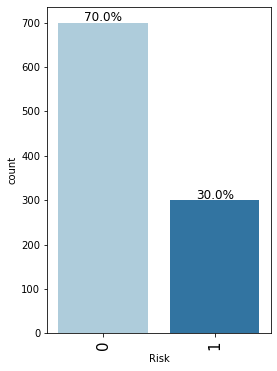

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data, "Risk", perc=True)

- As mentioned earlier, the class distribution in the target variable is imbalanced.
- We have 70% observations for non-defaulters and 30% observations for defaulters.

### Observations on Sex of Customers

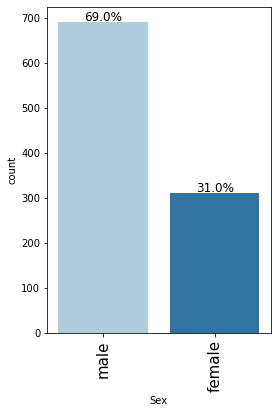

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data, "Sex", perc=True)

- Male customers are taking more credit than female customers
- There are 69% male customers and 31% female customers

### Observations on Housing

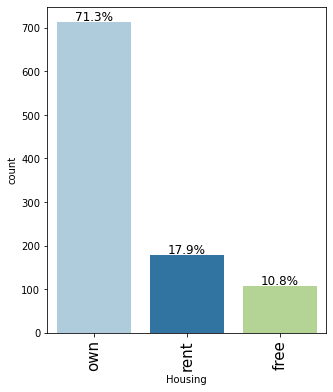

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(data, "Housing", perc=True)

- Major of the customers, approx 71%, who take credit have their own house
- Approx 18% customers are living in a rented house
- There are only 11% customers who have free housing. These are the customers who live in a house given by their company or organization

### Observations on Job

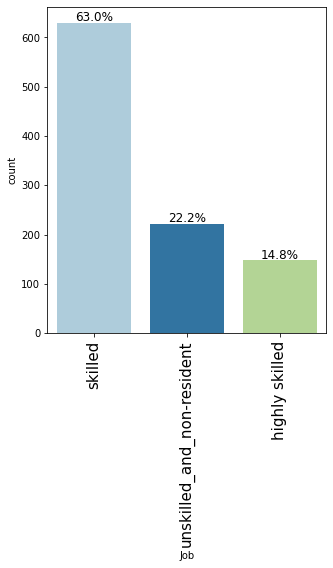

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(data, "Job", perc=True)

- Majority of the customers i.e. 63% fall into the skilled category.
- There are only approx 15% customers that lie in highly skilled category which makes sense as these may be the persons with high education or highly experienced.
- There are very few observations, approx 22%, with 0 or 1 job category.

### Observations on Saving accounts

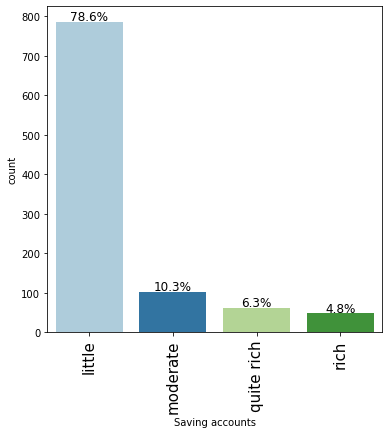

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "Saving accounts", perc=True)

- Approx 70% customers who take credit have a little or moderate amount in their savings account. This makes sense as these customers would need credit more than the other categories.
- Approx 11% customers who take credit are in the rich category based on their balance in the savings account.
- Note that the percentages do not add up to 100 as we have missing values in this column.

### Observations on Checking account

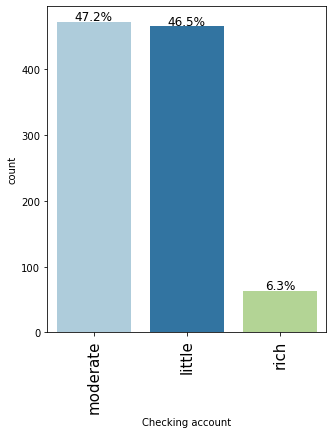

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "Checking account", perc=True)

- Approx 47% customers who take credit have a little or moderate amount in their checking account. This makes sense as these customers would need credit more than the other categories.
- Approx 6% customers who take credit are in the rich category based on their balance in the checking account.

### Observations on Purpose

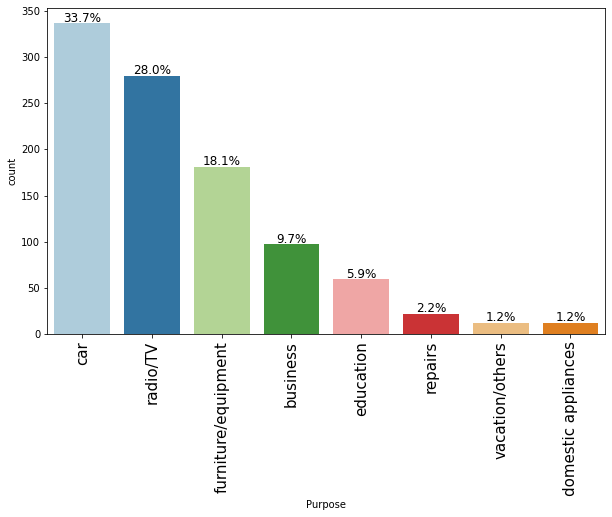

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "Purpose", perc=True)

- The plot shows that most customers take credit for luxury items like car, radio or furniture/equipment, domestic appliances.
- Approximately just 16% customers take credit for business or education

## Bivariate Analysis

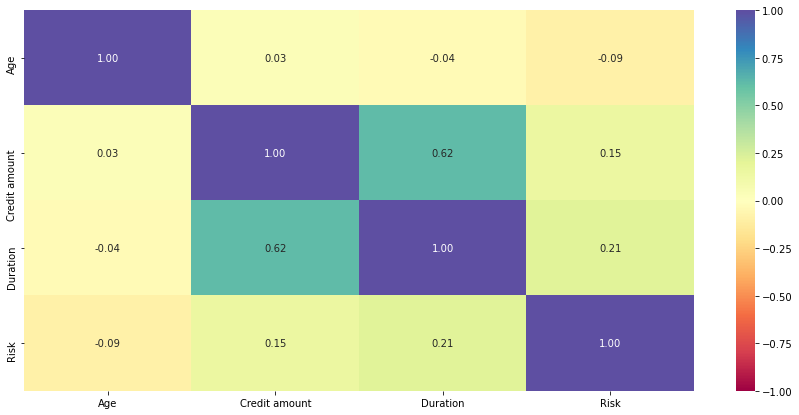

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Credit amount and duration have positive correlation which makes sense as customers might take the credit for longer duration if the amount of credit is high.
- Other variables have no significant correlation between them.

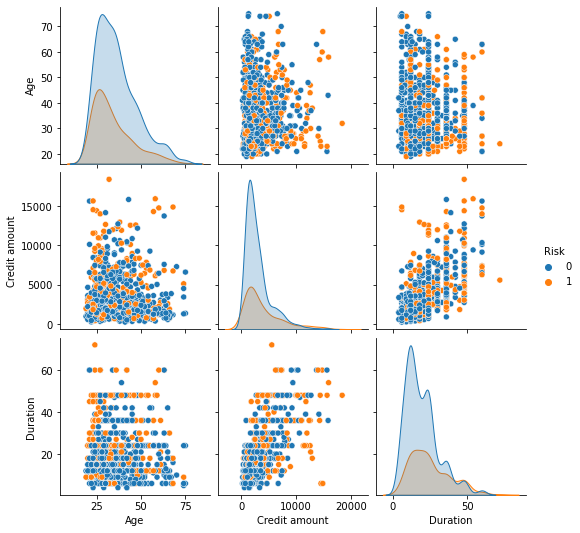

<IPython.core.display.Javascript object>

In [25]:
sns.pairplot(data, hue="Risk")
plt.show()

- There are overlaps i.e., no clear distinction in the distribution of variables for people who have defaulted and did not default.
- Let's explore this further with the help of other plots.

In [26]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Risk vs Age

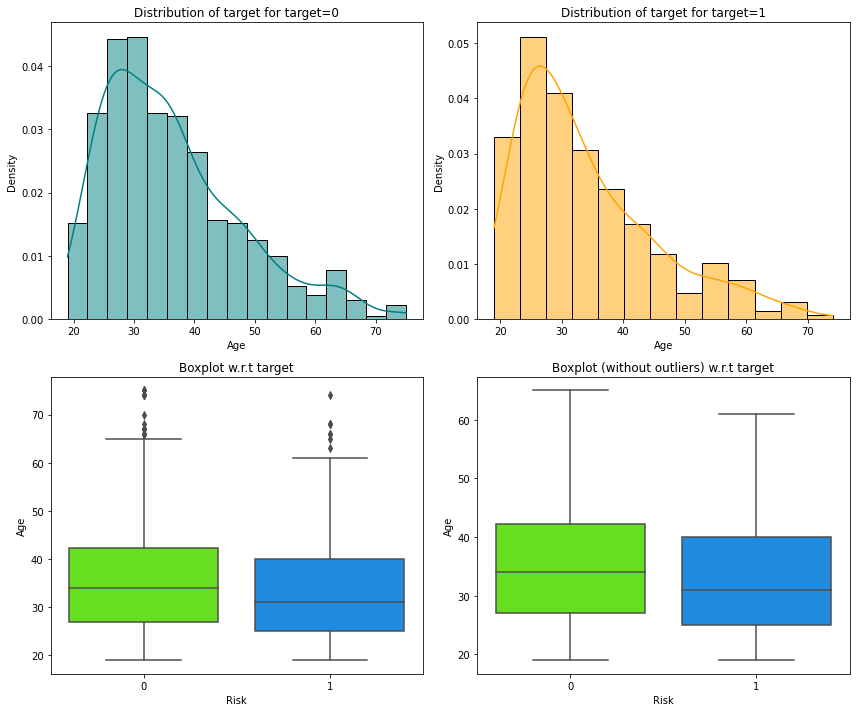

<IPython.core.display.Javascript object>

In [27]:
distribution_plot_wrt_target(data, "Age", "Risk")

- We can see that the median age of defaulters is less than the median age of non-defaulters.
- This shows that younger customers are more likely to default.
- There are outliers in boxplots of both class distributions

### Risk vs Credit amount

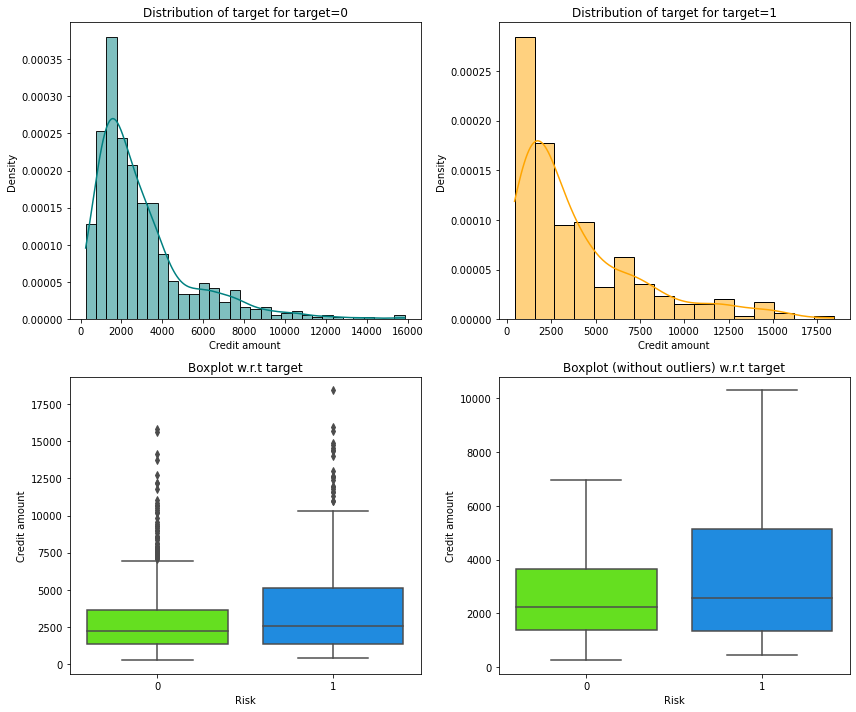

<IPython.core.display.Javascript object>

In [28]:
distribution_plot_wrt_target(data, "Credit amount", "Risk")

- We can see that the third quartile amount of defaulters is much more than the third quartile amount of non-defaulters.
- This shows that customers with high credit amount are more likely to default.
- There are outliers in boxplots of both class distributions

### Risk vs Duration

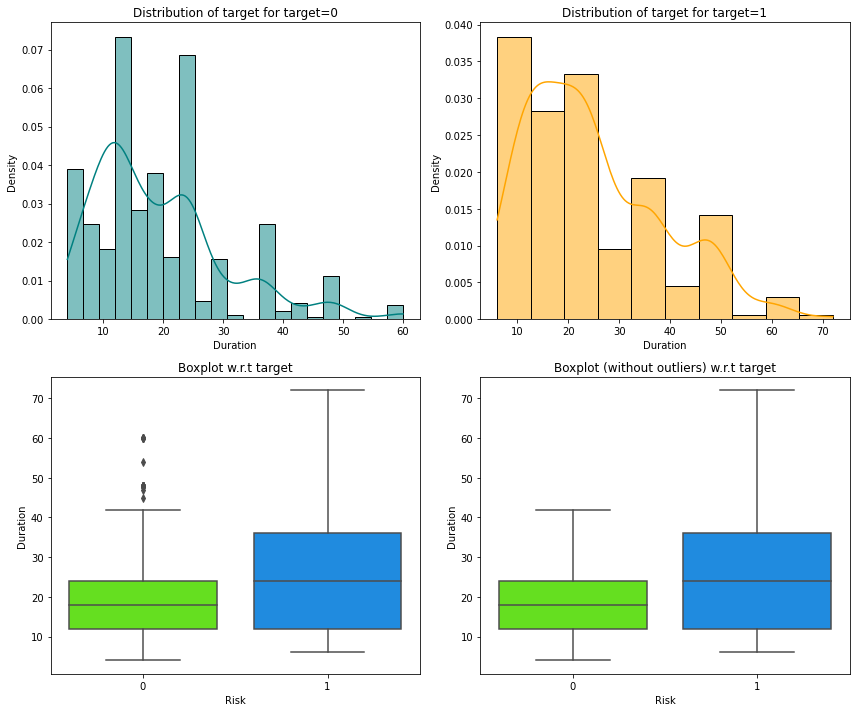

<IPython.core.display.Javascript object>

In [30]:
distribution_plot_wrt_target(data, "Duration", "Risk")

- We can see that the second and third quartiles of duration of defaulters is much more than the second and third quartiles duration of non-defaulters.
- This shows that customers with high duration are more likely to default.

In [31]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Risk vs Sex

Risk      0    1   All
Sex                   
All     700  300  1000
male    499  191   690
female  201  109   310
------------------------------------------------------------------------------------------------------------------------


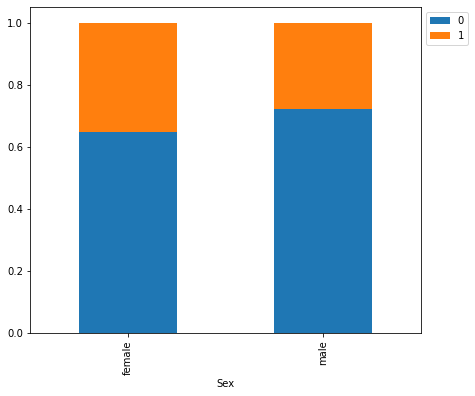

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(data, "Sex", "Risk")

- We saw earlier that the percentage of male customers is more than the female customers. This plot shows that female customers are more likely to default as compared to male customers.

### Risk vs Job

Risk                          0    1   All
Job                                       
All                         700  300  1000
skilled                     444  186   630
unskilled_and_non-resident  159   63   222
highly skilled               97   51   148
------------------------------------------------------------------------------------------------------------------------


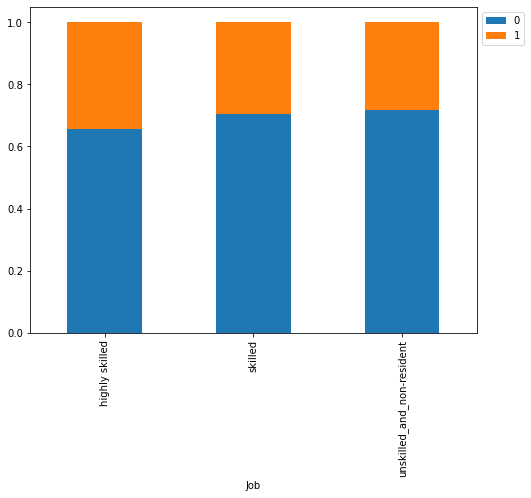

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(data, "Job", "Risk")

- There are no significant difference with respect to the job level
- However, highly skilled or unskilled/non-resident customers are more likely to default as compared to customers in 1 or 2 category 

### Risk vs Housing

Risk       0    1   All
Housing                
All      700  300  1000
own      527  186   713
rent     109   70   179
free      64   44   108
------------------------------------------------------------------------------------------------------------------------


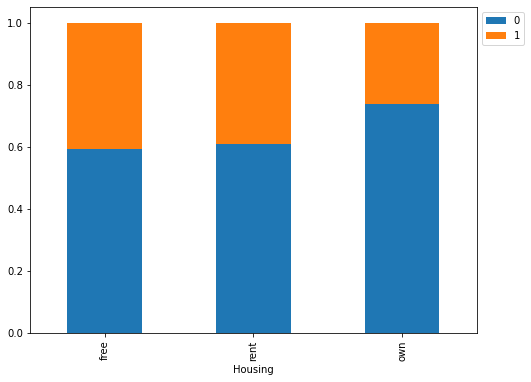

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(data, "Housing", "Risk")

- Customers owning a house are less likely to default
- Customers with free or rented housing are almost at same risk of default

### Risk vs Saving accounts

Risk               0    1   All
Saving accounts                
All              700  300  1000
little           537  249   786
moderate          69   34   103
quite rich        52   11    63
rich              42    6    48
------------------------------------------------------------------------------------------------------------------------


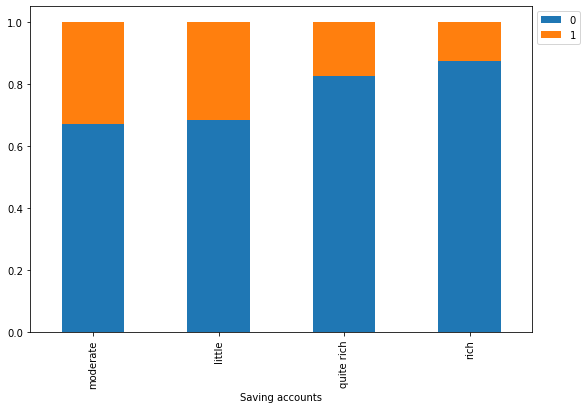

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(data, "Saving accounts", "Risk")

- Customers with little or moderate amounts in saving accounts are more likely to default.
- Rich customers are slightly less likely to default as compared to quite rich customers

### Risk vs Checking account

Risk                0    1   All
Checking account                
All               700  300  1000
little            304  161   465
moderate          347  125   472
rich               49   14    63
------------------------------------------------------------------------------------------------------------------------


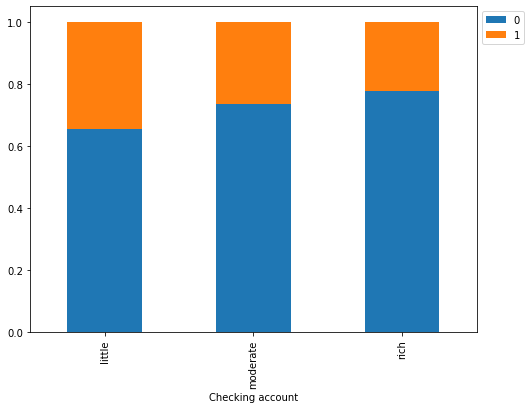

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "Checking account", "Risk")

- The plot further confirms the findings of the previous plot.
- Customers with little amount in checking accounts are most likely to default as compared to customers with moderate amount, which in turn, are more likely as compared to the rich customers.

### Risk vs Purpose

Risk                   0    1   All
Purpose                            
All                  700  300  1000
car                  231  106   337
radio/TV             218   62   280
furniture/equipment  123   58   181
business              63   34    97
education             36   23    59
repairs               14    8    22
vacation/others        7    5    12
domestic appliances    8    4    12
------------------------------------------------------------------------------------------------------------------------


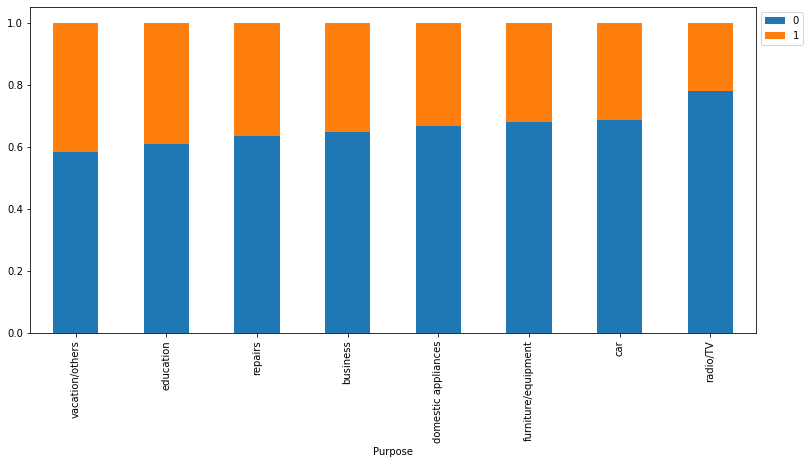

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "Purpose", "Risk")

- Customers who take credit for radio/TV are least likely to default. This might be because their credit amount is small.
- Customers who take credit for education or vacation are most likely to default.
- Other categories have no significant difference between their default and non-default ratio.